# Deep Learning 5: IMDB Classification using RNN and LSTM

We have explored the techniques of encoding the text data into Bag of Words and Embeddimgs model. And then used the encoding vectors to build simple NN models to predict if the sentiment of the sentence is positive or negative. In this tutorial we will go further and explore advanced models for sequence modelling using Recurrent Neural Networks and LSTM. RNN and LSTM models are widely used in natural language processing and times series predictions as these models have the ability to incorprate the temporal or sequential dependency of the features (words) i.e. the meaning for the sentence depends on where the word appears in the sentence. 

But first we will start loading and encoding the sentences.

### IMDB Movie Reviews

The dataset is available at https://www.kaggle.com/c/word2vec-nlp-tutorial/data

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews.

**Data Fields**

- id - Unique ID of each review
- sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
- review - Text of the review

### Loading the dataset

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Embedding, SimpleRNN
from keras import backend as K
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.callbacks import TensorBoard

In [ ]:
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.4.1
/device:GPU:0
Num GPUs Available:  1


In [ ]:
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
imdb_df = pd.read_csv('https://drive.google.com/uc?id=1dTdviN4n-417TAq3R-vyxp5Qa9wj-8dC&export=download', sep = '\t')

In [ ]:
pd.set_option('display.max_colwidth', 500)
imdb_df.head(5)

,id,sentiment,review
0,5814_8,1,"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle m..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different thin..."
2,7759_3,0,"The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like ¨Jurassik Park¨, and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwh..."
3,3630_4,0,"It must be assumed that those who praised this film (\the greatest filmed opera ever,\"" didn't I read somewhere?) either don't care for opera, don't care for Wagner, or don't care about anything except their desire to appear Cultured. Either as a representation of Wagner's swan-song, or as a movie, this strikes me as an unmitigated disaster, with a leaden reading of the score matched to a tricksy, lugubrious realisation of the text.<br /><br />It's questionable that people with ideas as to w..."
4,9495_8,1,"Superbly trashy and wondrously unpretentious 80's exploitation, hooray! The pre-credits opening sequences somewhat give the false impression that we're dealing with a serious and harrowing drama, but you need not fear because barely ten minutes later we're up until our necks in nonsensical chainsaw battles, rough fist-fights, lurid dialogs and gratuitous nudity! Bo and Ingrid are two orphaned siblings with an unusually close and even slightly perverted relationship. Can you imagine playfully..."


### Data Tokenization

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
num_words = 10000

In [ ]:
tokenizer = Tokenizer(num_words = num_words)

In [ ]:
tokenizer.fit_on_texts( imdb_df.review )

Tokenizer provides 4 attributes that you can use to query what has been learned about your documents:

- word_counts: A dictionary of words and their counts.
- word_docs: A dictionary of words and how many documents each appeared in.
- word_index: A dictionary of words and their uniquely assigned integers.
- document_count:An integer count of the total number of documents that were used to fit the Tokenizer.

### Encoding the documents 

#### Count vectors

In [ ]:
sequences = tokenizer.texts_to_sequences(imdb_df.review)

### Encode Y Variable

In [ ]:
y = np.array(imdb_df.sentiment)

In [ ]:
y[0:5]

array([1, 1, 0, 0, 1])

### Trim X

In [ ]:
from keras.preprocessing.sequence import pad_sequences 

max_review_length = 552

pad = 'pre'

X = pad_sequences(sequences, 
                  max_review_length, 
                  padding=pad, 
                  truncating=pad)


In [ ]:
X[0:1]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   16,   29,   11,  535, 

### Split Datasets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2)

In [ ]:
X_train.shape

(20000, 552)

In [ ]:
X_test.shape

(5000, 552)

In [ ]:
input_shape = X_train.shape

In [ ]:
input_shape

(20000, 552)

### Model 1 - RNN and Embeddings

In a simple NN model, the model learns from if the features(here it is words) exist in the sentence or not. And presence or absence of the word, along with the weights associated with it, decides the sentiment of the sentence. The position or the sequence of the word in the sentence doe not matter. This is actually not right, because the presence of the word in differnt position can actually alter the meaning of the sentence.

For example,

1. The movie is good, not bad at all (postive sentiment)
2. The movie is bad, not good at all (negative sentiment)

The data which is temporal (series or time sequence) in nature should be treated differently and the time sequence associated with it should be incoprated into the model.

RNN (Recurrent Neural Network) model takes care of this dependency.

In a RNN the neurons takes into consideration the current input and also what it has learned from the inputs it received previously.  

<img src="images/RNN_1.png" width="500">

The sentences are fed to the RNN model token by token in the same sequence at they appear in th sentence. When a new token is fed to the RNN unit, it associates a weight with the token and also takes the output of neuron when the previous token was fed to the neuron. The following diagrams depict this model better.

<img src="images/RNN_2.png" width="500">

And the weights are calculated as below.

<img src="images/RNN_3.png" width="500">

In the above diagram $x_{i}$ is the token (word) and $y$ is the sentiment of the sentence.

Excellent articles on understanding a simple RNN model are:

- https://machinelearning-blog.com/2018/02/21/recurrent-neural-networks/
- http://karpathy.github.io/2015/05/21/rnn-effectiveness/

In [ ]:
with tf.device(device_name):

  K.clear_session()

  rnn_model = Sequential()
  # We specify the maximum input length to our Embedding layer
  # so we can later flatten the embedded inputs
  rnn_model.add(Embedding(num_words, 
                          8, 
                          input_length=max_review_length))

  rnn_model.add(SimpleRNN(32))
  rnn_model.add(Dense(1))
  rnn_model.add(Activation('sigmoid'))
  rnn_model.summary()


  callbacks_list = [ReduceLROnPlateau(monitor='val_loss',
                                      factor=0.1, 
                                      patience=3),
                  EarlyStopping(monitor='val_loss',
                                patience=4),
                  ModelCheckpoint(filepath='imdb_rnn_model.h5',
                                  monitor='val_loss',
                                  save_best_only=True),
                  TensorBoard("./imdb_rnn_logs")]


  rnn_model.compile(optimizer="adam", 
                loss='binary_crossentropy', 
                metrics=['accuracy'])


  rnn_history = rnn_model.fit(X_train, 
                                y_train,
                                epochs=2,
                                batch_size=32,
                                callbacks=callbacks_list,
                                validation_split=0.3)                 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 552, 8)            80000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                1312      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 81,345
Trainable params: 81,345
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
438/438 [==============================] - 174s 390ms/step - loss: 0.6904 - accuracy: 0.5240 - val_loss: 0.6005 - val_accuracy: 0.6772
Epoch 2/10
438/438 [==============================] - 166s 380ms/step - loss: 0.5468 - accuracy: 0.7495 

KeyboardInterrupt: ignored

Epoch 1/10
 24/438 [>.............................] - ETA: 3:03 - loss: 0.3444 - accuracy: 0.8560

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [ ]:
def plot_accuracy(hist):
    plt.plot(hist['acc'])
    plt.plot(hist['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 
                'test'], 
               loc='upper left')
    plt.show()
    
def plot_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 
                'test'], 
               loc='upper left')
    plt.show()    

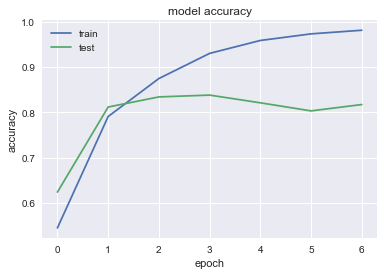

In [ ]:
plot_accuracy( rnn_history.history )

### LSTM

RNNs are typically known to learn the word dependencies if they are next to each other or nearer to each other. If the words are far from each other in a sentence are dependent, then RNNs are not known to learn better. For example, the sentence:

*I grew up in france, hence beside several other languages I also speak .....*

So, if the model need to predict the word *french*, then it needs to remember the word *france*, which appears at very beginning of the sentence. 

RNNs suffer from something called exploding and vanishing gradients. 

These problems are addressed in LSTM (Long Short Term Memory) models, which is capable of learning long-term dependencies.

LSTM’s enable RNN’s to remember their inputs over a long period of time. This is because LSTM’s contain their information in a memory, that is much like the memory of a computer because the LSTM can read, write and delete information from its memory.

<img src="images/LSTM_1.png" width="500">

An excellent artile on *Understanding LSTM Networks* available [here](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

In [ ]:
from keras.layers import LSTM

K.clear_session()

lstm_model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
lstm_model.add(Embedding(num_words, 
                        32, 
                        input_length=max_review_length))

lstm_model.add(LSTM(32))
lstm_model.add(Dense(1))
lstm_model.add(Activation('sigmoid'))
lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 552, 32)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.compile(optimizer="adam", 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

lstm_history = lstm_model.fit(X_train, 
                              y_train,
                              epochs=2,
                              batch_size=128,
                              callbacks=callbacks_list,
                              validation_split=0.3)

Train on 14000 samples, validate on 6000 samples


Epoch 1/10
14000/14000 [==============================] - 124s 9ms/step - loss: 0.5557 - acc: 0.7106 - val_loss: 0.3586 - val_acc: 0.8483


Epoch 2/10
14000/14000 [==============================] - 124s 9ms/step - loss: 0.4026 - acc: 0.8371 - val_loss: 0.3457 - val_acc: 0.8473


Epoch 3/10
14000/14000 [==============================] - 123s 9ms/step - loss: 0.2316 - acc: 0.9129 - val_loss: 0.3057 - val_acc: 0.8755


Epoch 4/10
14000/14000 [==============================] - 123s 9ms/step - loss: 0.1618 - acc: 0.9449 - val_loss: 0.3270 - val_acc: 0.8725


Epoch 5/10
14000/14000 [==============================] - 123s 9ms/step - loss: 0.1083 - acc: 0.9672 - val_loss: 0.3389 - val_acc: 0.8687


Epoch 6/10
14000/14000 [==============================] - 123s 9ms/step - loss: 0.0791 - acc: 0.9786 - val_loss: 0.3635 - val_acc: 0.8677


Epoch 7/10
14000/14000 [==============================] - 124s 9ms/step - loss: 0.0651 - acc: 0.9821 - val_loss: 0.4351 - val_acc: 0.8618


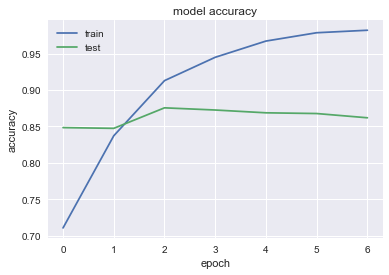

In [ ]:
plot_accuracy( lstm_history.history )

### LSTM with Dropouts

In [ ]:
from keras.layers import LSTM

K.clear_session()

lstm_model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
lstm_model.add(Embedding(num_words, 
                        8, 
                        input_length=max_review_length))

lstm_model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1))
lstm_model.add(Activation('sigmoid'))
lstm_model.summary()

lstm_model.compile(optimizer="adam", 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

lstm_history = lstm_model.fit(X_train, 
                              y_train,
                              epochs=10,
                              batch_size=32,
                              callbacks=callbacks_list,
                              validation_split=0.3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 552, 8)            80000     
_________________________________________________________________
lstm (LSTM)                  (None, 32)                5248      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 85,281
Trainable params: 85,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
  2/438 [..............................] - ETA: 25:18 - loss: 0.6931 - accuracy: 0.5391

KeyboardInterrupt: ignored

In [ ]:
plot_accuracy( lstm_history.history )

### Sequence Processing with ConvNets

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten

In [ ]:
K.clear_session()

model = Sequential()
model.add(Embedding(num_words, 
                        8, 
                        input_length=max_review_length))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 552, 8)            80000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 546, 32)           1824      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 109, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 103, 32)           7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 89,057
Trainable params: 89,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers import RMSprop

In [ ]:
rmsprop = RMSprop(lr=0.0001)
model.compile(optimizer=rmsprop,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, 
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 9s 564us/step - loss: 1.3781 - acc: 0.4978 - val_loss: 0.8659 - val_acc: 0.4943
Epoch 2/10
16000/16000 [==============================] - 9s 550us/step - loss: 0.7350 - acc: 0.5091 - val_loss: 0.6901 - val_acc: 0.5605
Epoch 3/10
16000/16000 [==============================] - 9s 554us/step - loss: 0.6844 - acc: 0.5881 - val_loss: 0.6845 - val_acc: 0.5740
Epoch 4/10
16000/16000 [==============================] - 9s 557us/step - loss: 0.6770 - acc: 0.6389 - val_loss: 0.6786 - val_acc: 0.6498
Epoch 5/10
16000/16000 [==============================] - 9s 561us/step - loss: 0.6686 - acc: 0.6778 - val_loss: 0.6708 - val_acc: 0.6388
Epoch 6/10
16000/16000 [==============================] - 9s 570us/step - loss: 0.6568 - acc: 0.7074 - val_loss: 0.6591 - val_acc: 0.6887
Epoch 7/10
16000/16000 [==============================] - 9s 580us/step - loss: 0.6396 - acc: 0.7349 - val_loss: 0.6410 - v

### Saving the Model 

For applying the model for making predictions in future, we need to save the following parameters. For example, we are going to use the model *lstm_history*

1. The model object (it includes the model parameters)
2. The tokenizer (this contains the words and their indexes we used to build the mode.) The new sentence should have the same indexes as the dictionary we used.
3. max_review_length 
4. The padding and truncating strategy we used.

In [ ]:
lstm_model.save_weights( 'lstm_model_file.h5' )

In [ ]:
word_preprocess_details = { max_review_length: 'max_review_length',
                            'pad': pad,
                            'tokenizer': tokenizer }

In [ ]:
import pickle

In [ ]:
with open( 'word_preprocess.pkl', 'wb' ) as f:
    pickle.dump( word_preprocess_details, f )

In [ ]:
!ls -al *.h5

-rw-r--r--  1 manaranjan  staff   1836984 Jun  6 14:10 imdb_model.h5
-rw-r--r--  1 manaranjan  staff  36288576 Jun  7 10:41 imdb_pretrained_model.h5
-rw-r--r--  1 manaranjan  staff   3965720 Jun  7 13:52 imdb_rnn_model.h5
-rw-r--r--  1 manaranjan  staff   1329512 Jun  7 14:11 lstm_model_file.h5


In [ ]:
!ls -al word_preprocess.pkl

-rw-r--r--  1 manaranjan  staff  3601056 Jun  7 14:15 word_preprocess.pkl


### Conclusion:

Through tutorials *Deep Learning 4* and *5*, we explored the steps of 

- Preprocessing text documents using Bag of Words and Embedding model
- Using RNN model to predict
- Using LSTM Model to incorporate longer dependencies.
- Using Conv1D model for building higher level features.